In [243]:
import pandas as pd

In [244]:
df = pd.read_csv("laptop_price.csv", encoding = "latin-1")

In [245]:
df.drop(columns=["Product"], inplace=True)

In [246]:
df

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [247]:
df = df.join(pd.get_dummies(df.Company, dtype='int'))

In [248]:
df.drop(columns=["Company"], inplace=True)

In [249]:
df = df.join(pd.get_dummies(df.TypeName, dtype='int'))
df.drop(columns=['TypeName'], inplace=True)

In [250]:
df['IPS'] = df['ScreenResolution'].str.split(" ").apply(lambda x : 1 if x[0] == 'IPS' else 0)

In [251]:
df['ScreenResolution'] = df.ScreenResolution.str.split(" ").apply(lambda x : x[-1])

In [252]:
df['Screen_Width'] = df.ScreenResolution.str.split("x").apply(lambda x : x[0])

In [253]:
df['Screen_Height'] = df.ScreenResolution.str.split("x").apply(lambda x : x[1])

In [254]:
df.drop(columns=['ScreenResolution'], inplace=True)

In [255]:
df

,laptop_ID,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,...,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,IPS,Screen_Width,Screen_Height
0,1,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,...,0,0,0,0,0,1,0,1,2560,1600
1,2,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,...,0,0,0,0,0,1,0,0,1440,900
2,3,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,...,0,0,0,0,1,0,0,0,1920,1080
3,4,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,...,0,0,0,0,0,1,0,1,2880,1800
4,5,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,...,0,0,0,0,0,1,0,1,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,0,...,0,1,0,0,0,0,0,1,1920,1080
1299,1317,13.3,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,0,...,0,1,0,0,0,0,0,1,3200,1800
1300,1318,14.0,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,0,...,0,0,0,0,1,0,0,0,1366,768
1301,1319,15.6,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,0,...,0,0,0,0,1,0,0,0,1366,768


In [256]:
df['CPU_Brand'] = df.Cpu.str.split(" ").apply(lambda x : x[0])
df['CPU_Frequency'] = df.Cpu.str.split(" ").apply(lambda x : x[-1])

In [257]:
df.drop(columns=['Cpu'], inplace=True)

In [258]:
df['CPU_Frequency'] = df['CPU_Frequency'].str[:-3]

In [259]:
df['Ram'] = df['Ram'].str[:-2]

In [260]:
df

,laptop_ID,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,...,Gaming,Netbook,Notebook,Ultrabook,Workstation,IPS,Screen_Width,Screen_Height,CPU_Brand,CPU_Frequency
0,1,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,...,0,0,0,1,0,1,2560,1600,Intel,2.3
1,2,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,1,...,0,0,0,1,0,0,1440,900,Intel,1.8
2,3,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,...,0,0,1,0,0,0,1920,1080,Intel,2.5
3,4,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,...,0,0,0,1,0,1,2880,1800,Intel,2.7
4,5,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,...,0,0,0,1,0,1,2560,1600,Intel,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,0,0,...,0,0,0,0,0,1,1920,1080,Intel,2.5
1299,1317,13.3,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,0,0,...,0,0,0,0,0,1,3200,1800,Intel,2.5
1300,1318,14.0,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,0,0,...,0,0,1,0,0,0,1366,768,Intel,1.6
1301,1319,15.6,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,0,0,...,0,0,1,0,0,0,1366,768,Intel,2.5


In [261]:
df['Ram'] = df['Ram'].astype('int')
df['CPU_Frequency'] = df['CPU_Frequency'].astype('float')

In [262]:
df["Screen_Height"] = df['Screen_Height'].astype('int')
df["Screen_Width"] = df["Screen_Width"].astype('int')

In [263]:
df["Memory_Size"] = df["Memory"].str.split(" ").apply(lambda x : x[0])

In [264]:
df["Memory_Type"] = df["Memory"].str.split(" ").apply(lambda x : x[1])

In [265]:
def mem_to_tb(value):
    if "TB" in value:
        return float(value[:-2])*1024
    else:
        return float(value[:-2])

In [266]:
df['Memory_Size'] = df['Memory_Size'].apply(mem_to_tb)

In [267]:
df.drop(columns=['Memory'], inplace=True)

In [268]:
df['Weight'] = df['Weight'].apply(lambda x : x[:-2]).astype('float')

In [269]:
df['Gpu_Brand'] = df['Gpu'].str.split(" ").apply(lambda x : x[0])

In [270]:
df = df.join(pd.get_dummies(df.Memory_Type, dtype='int'))

In [271]:
df.drop(columns=['Memory_Type'], inplace=True)

In [272]:
df = df.join(pd.get_dummies(df.Gpu_Brand, dtype='int'))

In [273]:
df.drop(columns=['Gpu_Brand'], inplace=True)

In [274]:
df = df.join(pd.get_dummies(df.OpSys, dtype='int'))

In [275]:
df.drop(columns=['OpSys'], inplace=True)

In [276]:
df['Gpu_Brand'] = df['Gpu'].str.split(" ").apply(lambda x : x[0])  

In [277]:
df['Gpu_Brand']

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: Gpu_Brand, Length: 1303, dtype: object

In [278]:
gpu = pd.get_dummies(df.Gpu_Brand, dtype='int')

In [279]:
gpu.columns = [col + '_gpu' for col in gpu.columns]
df = df.join(gpu)

In [280]:
df.drop(columns=['Gpu_Brand', 'Gpu'], inplace=True)

In [281]:
df.drop(columns=['CPU_Brand'], inplace=True)

<Axes: >

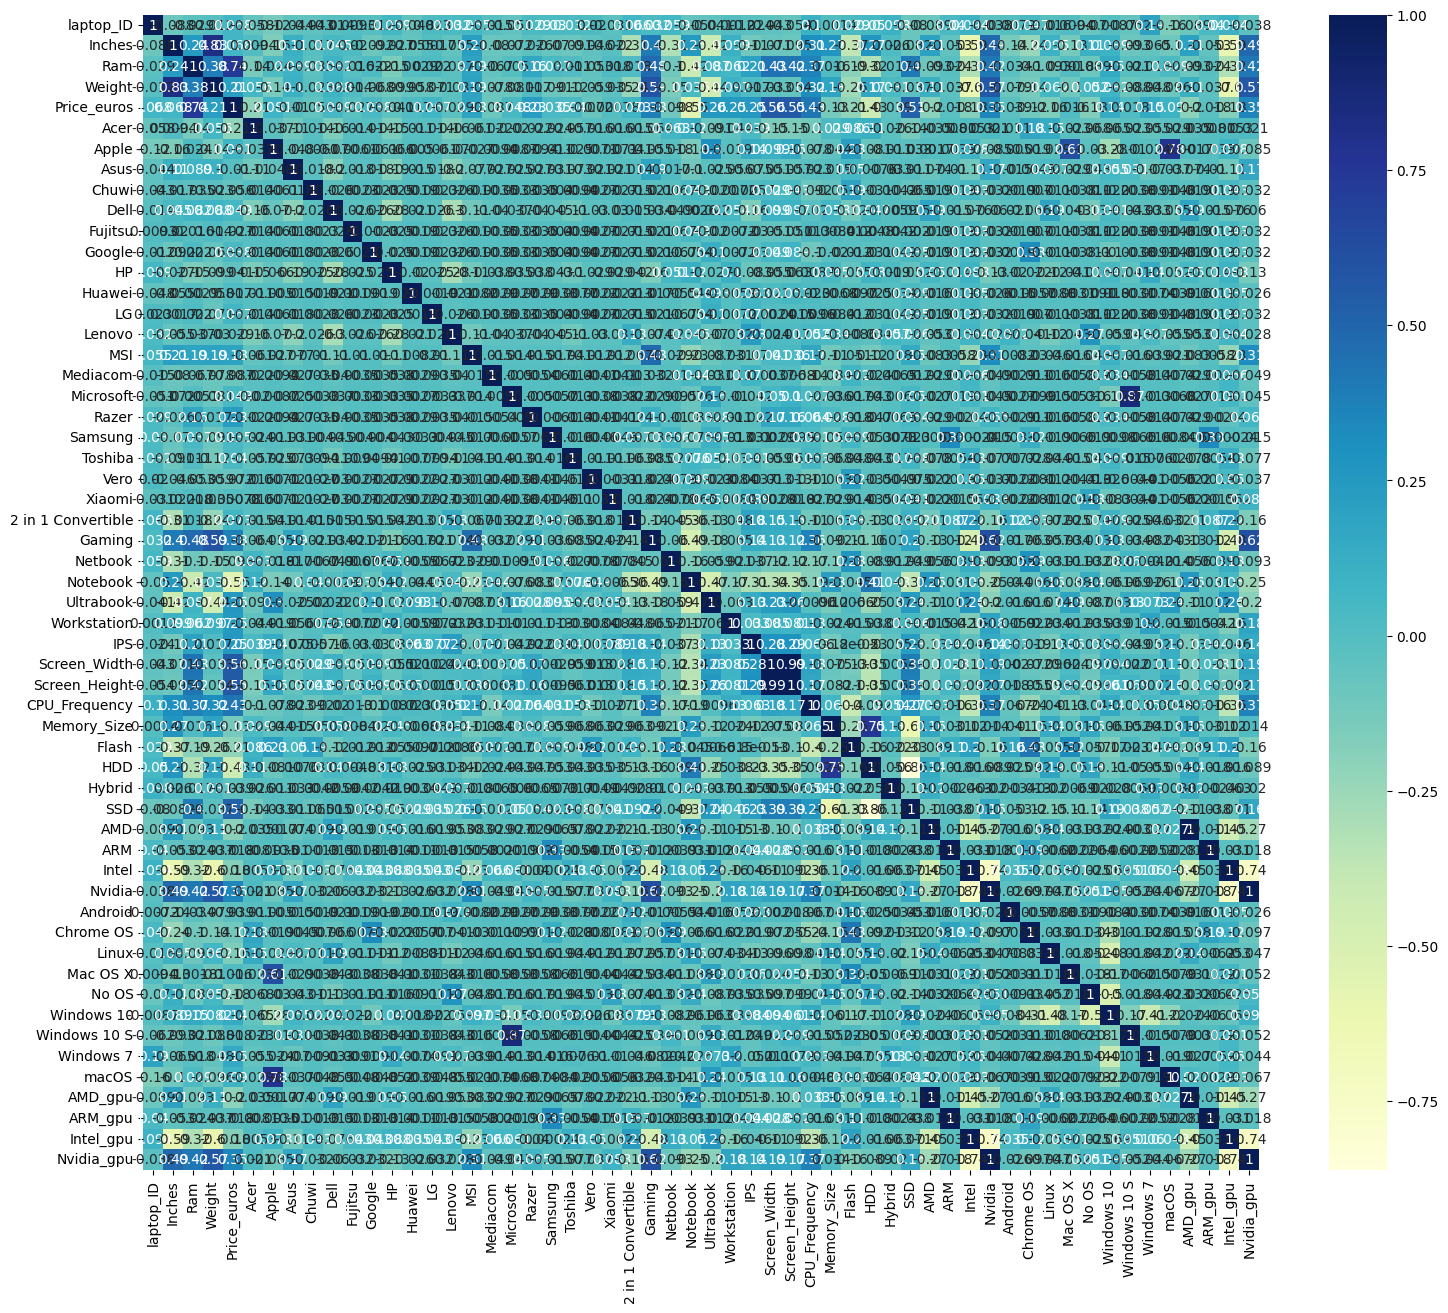

In [282]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(18, 15))
sns.heatmap(numerical_df.corr(), annot=True, cmap="YlGnBu")

In [374]:
df.columns


Index(['laptop_ID', 'Inches', 'Ram', 'Weight', 'Price_euros', 'Acer', 'Apple',
       'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG',
       'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba',
       'Vero', 'Xiaomi', '2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook',
       'Ultrabook', 'Workstation', 'IPS', 'Screen_Width', 'Screen_Height',
       'CPU_Frequency', 'Memory_Size', 'Flash', 'HDD', 'Hybrid', 'SSD', 'AMD',
       'ARM', 'Intel', 'Nvidia', 'Android', 'Chrome OS', 'Linux', 'Mac OS X',
       'No OS', 'Windows 10', 'Windows 10 S', 'Windows 7', 'macOS', 'AMD_gpu',
       'ARM_gpu', 'Intel_gpu', 'Nvidia_gpu'],
      dtype='object')

In [375]:
target_correlation = df.corr()['Price_euros'].apply(abs).sort_values()

In [376]:
target_correlation

Xiaomi                0.000776
Asus                  0.010376
Mac OS X              0.015656
Huawei                0.016851
Windows 10 S          0.018312
ARM_gpu               0.018431
ARM                   0.018431
Fujitsu               0.027135
Lenovo                0.029007
Samsung               0.034584
Google                0.038086
Android               0.038700
Hybrid                0.039386
Toshiba               0.040339
HP                    0.041291
Microsoft             0.047562
Dell                  0.048509
Chuwi                 0.055646
LG                    0.067053
laptop_ID             0.067830
Inches                0.068197
Vero                  0.071972
2 in 1 Convertible    0.072675
Apple                 0.080688
Mediacom              0.087161
macOS                 0.089928
Netbook               0.097572
Chrome OS             0.118684
Memory_Size           0.125363
Windows 10            0.137048
Windows 7             0.152381
Linux                 0.162060
No OS   

In [386]:
selected_features = list(target_correlation[-21:].index)

In [387]:
selected_features

['Intel',
 'AMD_gpu',
 'AMD',
 'Acer',
 'Weight',
 'Flash',
 'Razer',
 'Workstation',
 'IPS',
 'Ultrabook',
 'Nvidia_gpu',
 'Nvidia',
 'Gaming',
 'HDD',
 'CPU_Frequency',
 'SSD',
 'Notebook',
 'Screen_Height',
 'Screen_Width',
 'Ram',
 'Price_euros']

In [388]:
limited_df = df[selected_features]

In [389]:
limited_df

,Intel,AMD_gpu,AMD,Acer,Weight,Flash,Razer,Workstation,IPS,Ultrabook,...,Nvidia,Gaming,HDD,CPU_Frequency,SSD,Notebook,Screen_Height,Screen_Width,Ram,Price_euros
0,1,0,0,0,1.37,0,0,0,1,1,...,0,0,0,2.3,1,0,1600,2560,8,1339.69
1,1,0,0,0,1.34,1,0,0,0,1,...,0,0,0,1.8,0,0,900,1440,8,898.94
2,1,0,0,0,1.86,0,0,0,0,0,...,0,0,0,2.5,1,1,1080,1920,8,575.00
3,0,1,1,0,1.83,0,0,0,1,1,...,0,0,0,2.7,1,0,1800,2880,16,2537.45
4,1,0,0,0,1.37,0,0,0,1,1,...,0,0,0,3.1,1,0,1600,2560,8,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1,0,0,0,1.80,0,0,0,1,0,...,0,0,0,2.5,1,0,1080,1920,4,638.00
1299,1,0,0,0,1.30,0,0,0,1,0,...,0,0,0,2.5,1,0,1800,3200,16,1499.00
1300,1,0,0,0,1.50,1,0,0,0,0,...,0,0,0,1.6,0,1,768,1366,2,229.00
1301,0,1,1,0,2.19,0,0,0,0,0,...,0,0,1,2.5,0,1,768,1366,6,764.00


<Axes: >

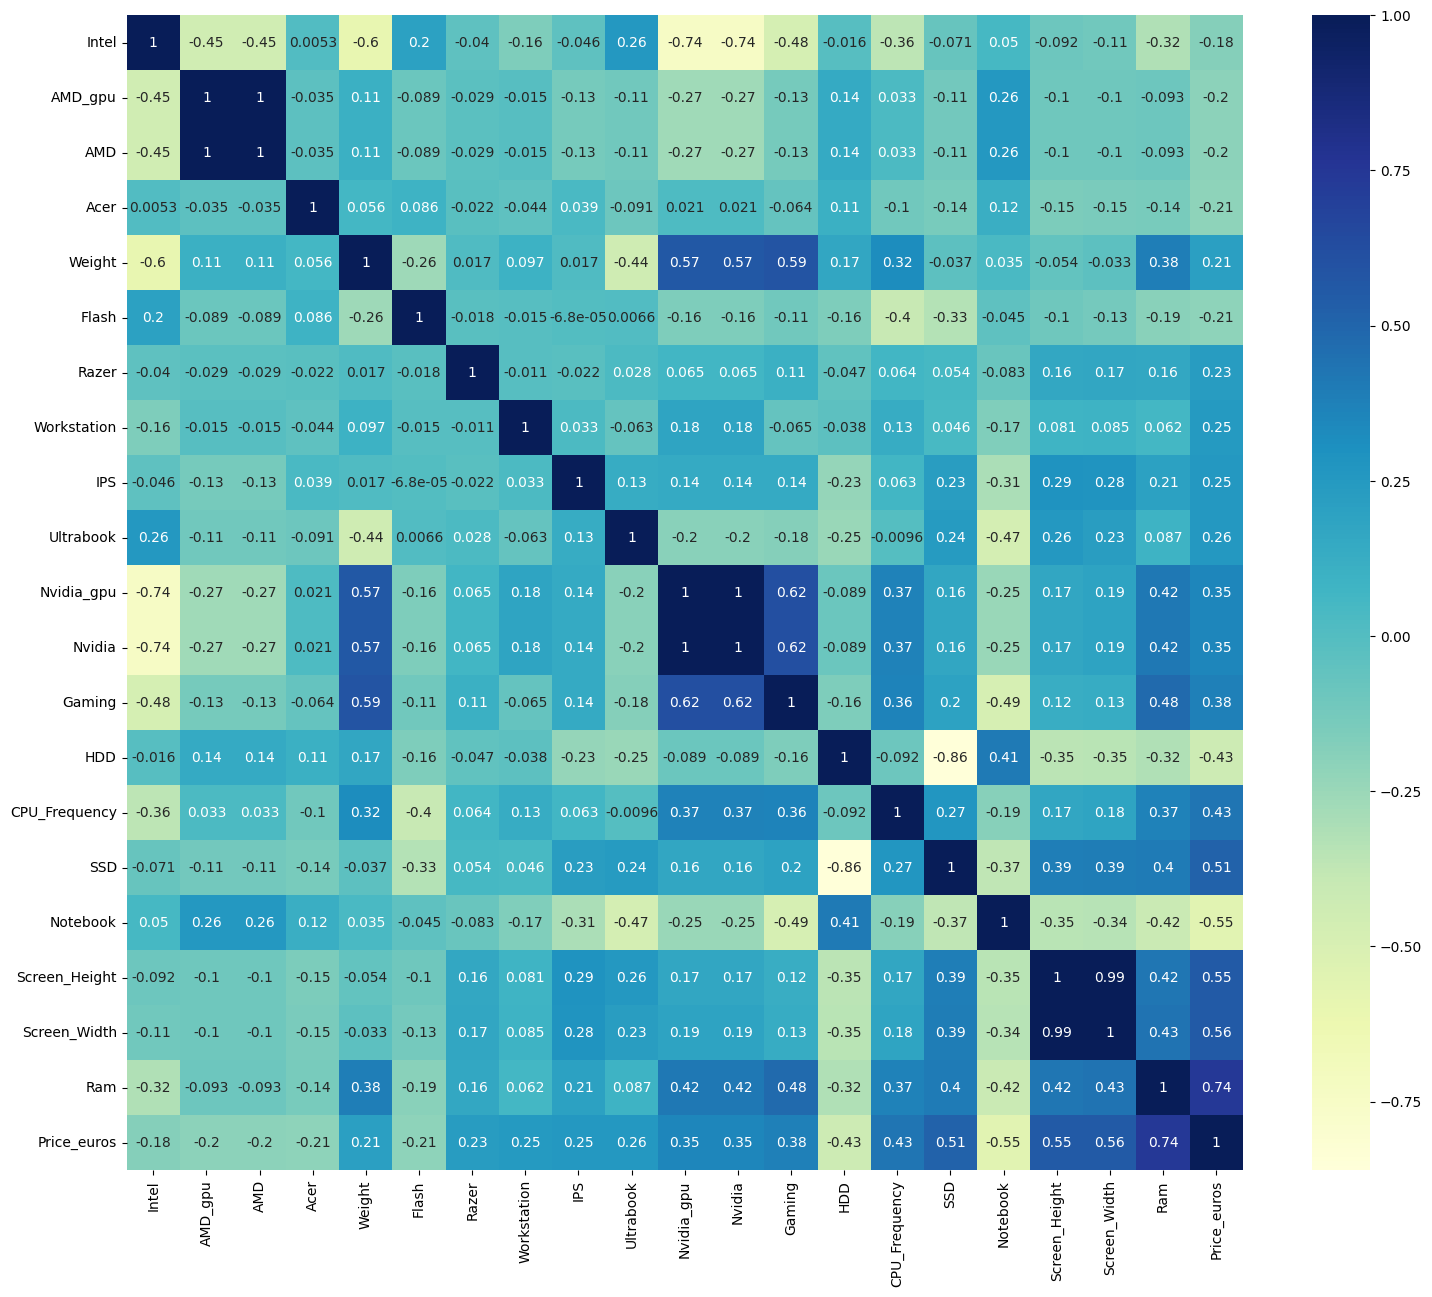

In [390]:
plt.figure(figsize=(18, 15))
sns.heatmap(limited_df.corr(), annot=True, cmap="YlGnBu")

In [411]:
x

In [412]:
# Random Forest Regressor

forest = RandomForestRegressor()

forest.fit(x_train_scaled, y_train)

RandomForestRegressor()

In [413]:
forest.score(x_test_scaled, y_test)

0.8629046419503231

In [414]:
y_pred = forest.predict(x_test_scaled)

0.8629046419503231

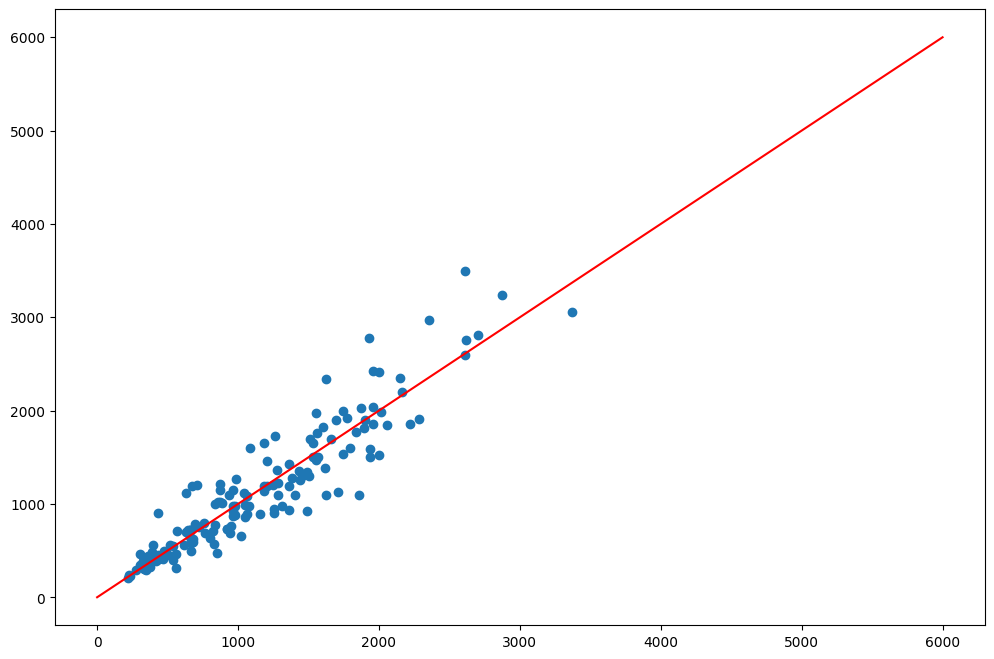

In [416]:
plt.figure(figsize=(12, 8))
plt.scatter(y_pred, y_test)
plt.plot(range(0, 6000), range(0, 6000), c="red")

In [403]:
x_new_scaled = scaler.transform([x_test.iloc[0]])

c:\Users\shrey\anaconda3\envs\mlproject\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [417]:
forest.predict(x_new_scaled)

c:\Users\shrey\anaconda3\envs\mlproject\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([375.1583])

In [405]:
y_test.iloc[0]

859.01